<a href="https://colab.research.google.com/github/HyungJunByun/practice-history/blob/main/%EB%8C%80%EA%B8%B0%EB%AC%BC%EB%A6%AC_2_HW_1_Feigenbaum_diagram_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 대기물리 2 HW #1: Feigenbaum diagram code
2023-13970 변형준



1-1, construct the Feigenbaum diagram.

In [11]:
#모듈 임포트
import numpy as np
from matplotlib import pyplot as plt


In [2]:
#함수 정의
def quadra(xn, a):
  return a*xn*(1-xn)

In [9]:
#함수 테스트
x0=0.5
a=3
pre=x0
for _ in range(10000):
  pre=quadra(pre, a)
print(pre)

0.664303093897268


In [10]:
#최종값 도출 함수 quadra_final
def quadra_final(x0, a, n):
  pre=x0
  for _ in range(n):
    pre=quadra(pre, a)
  return(pre)

In [6]:
"""
변수가
a, x0, 시행횟수?
range함수는 정수만 반환. np.arrange함수를 사용하여야 소수를 다룰 수 있다.

In [108]:
#a에 대한 x값들 지정
def quadra_a(a):
  x_values=[]
  y_values=[]
  for x0 in np.arange(0,1,0.01):
    y_values.append(quadra_final(x0, a, 10000))
  x_values=[a]*len(y_values)
  return(x_values,y_values)

1.0


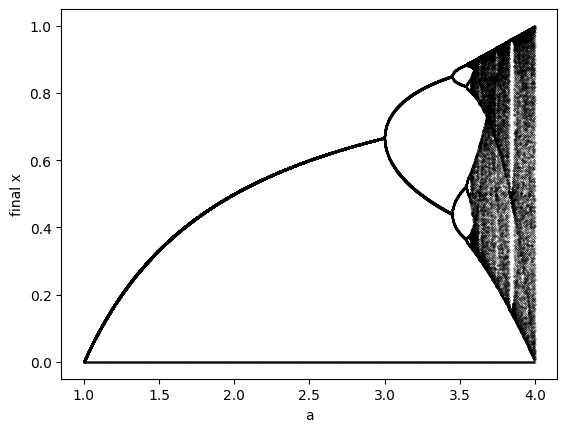

In [51]:
#최종 Feigenbaum diagram 그리기
for a in np.arange(1,4,0.001):
  x_values, y_values=quadra_a(a)
  plt.scatter(x_values, y_values, s=0.01, color='k')

plt.xlabel('a')
plt.ylabel('final x')
plt.show()

1-2. Examine the self-similarity by constructing the Feigenbaum diagrams.

그래프 1. a=[3,3.678], y축 역전

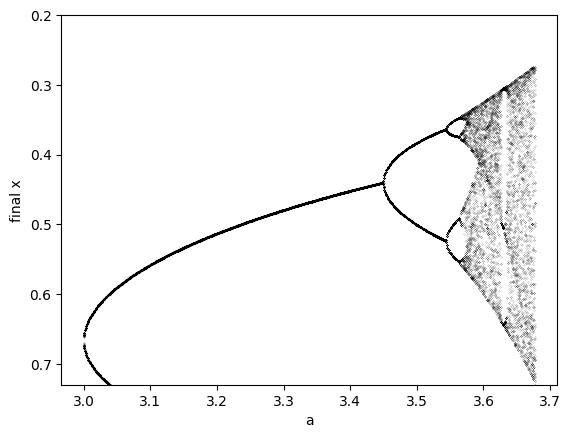

In [52]:
#최종 Feigenbaum diagram 그리기
for a in np.arange(3,3.678,0.001):
  x_values, y_values=quadra_a(a)
  plt.scatter(x_values, y_values, s=0.01, color='k')
plt.xlabel('a')
plt.ylabel('final x')
plt.ylim([0.2,0.73])
plt.gca().invert_yaxis()
plt.show()

그래프 2. a=[3.451,3.594], 정상 y축

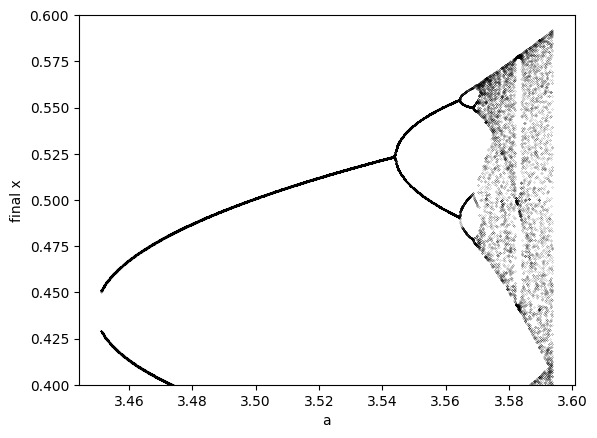

In [58]:
#최종 Feigenbaum diagram 그리기
for a in np.arange(3.4512,3.5938,0.0001):
  x_values, y_values=quadra_a(a)
  plt.scatter(x_values, y_values, s=0.01, color='k')
plt.xlabel('a')
plt.ylabel('final x')
plt.ylim([0.4,0.6])
#plt.gca().invert_yaxis()
plt.show()

그래프 3. a=[3.54416,3.57490], y축 역전

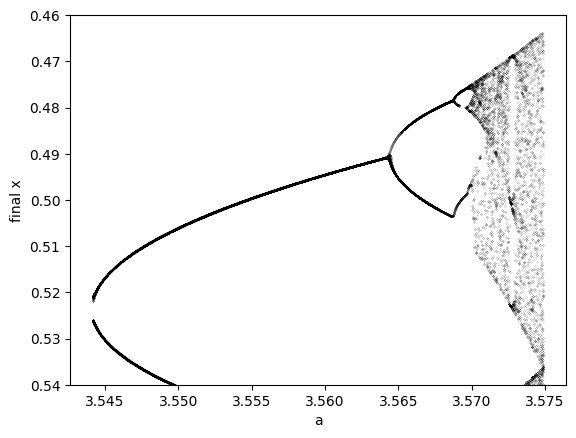

In [54]:
#최종 Feigenbaum diagram 그리기
for a in np.arange(3.54416,3.57490,0.00001):
  x_values, y_values=quadra_a(a)
  plt.scatter(x_values, y_values, s=0.01, color='k')
plt.xlabel('a')
plt.ylabel('final x')
plt.ylim([0.46,0.54])
plt.gca().invert_yaxis()
plt.show()

1-3. Calculate the Feigenbaum constant as accurately as possible

In [109]:
numlist=[]
for a in np.arange(1,4,0.001):
  x_values, y_values=quadra_a(a)
  difY_error=list(set(y_values))
  difY=[]
  for i in range(len(difY_error)):
    if len(difY)==0:
      difY.append(difY_error[i])
    else:
      for j in range(len(difY)):
        if float(difY_error[i])-float(difY[j])<0.001: #error
          break
        if j==len(difY)-1:
          difY.append(difY_error[i])
  print(difY)

  numlist.append(len(difY))

[0.0]
[0.0]
[0.0, 0.0019960079879995374]
[0.0, 0.002991026919242197]
[0.0, 0.003984063745019643]
[0.0, 0.004975124378109008]
[0.0, 0.0059642147117290375]
[0.0, 0.006951340615689524]
[0.0, 0.007936507936507298]
[0.0, 0.00891972249752143]
[0.0, 0.009900990099008916]
[0.0, 0.010880316518297408]
[0.0, 0.0118577075098803]
[0.0, 0.012833168805526598]
[0.0, 0.013806706114396994]
[0.0, 0.01477832512315119]
[0.0, 0.015748031496061132]
[0.0, 0.016715830875121337]
[0.0, 0.017681728880155123]
[0.0, 0.01864573110892842]
[0.0, 0.01960784313725289]
[0.0, 0.02056807051909684]
[0.0, 0.021526418786690534]
[0.0, 0.022482893450633087]
[0.0, 0.023437499999997394]
[0.0, 0.024390243902436545]
[0.0, 0.025341130604285916]
[0.0, 0.026290165530669152]
[0.0, 0.027237354085600293]
[0.0, 0.028182701652086525]
[0.0, 0.029126213592229833]
[0.0, 0.030067895247329595]
[0.0, 0.031007751937981345]
[0.0, 0.03194578896417847]
[0.0, 0.03288201160541243]
[0.0, 0.03381642512076948]
[0.0, 0.03474903474903128]
[0.0, 0.035679845

In [117]:
points=[]
max=0
for i in range(len(numlist)-1):
  if numlist[i]>max and numlist[i]==numlist[i+1]:
    points.append(1+i*0.001)
    max=numlist[i]

In [118]:
#분기점 a값들
print(points)

[1.0, 1.002, 3.0, 3.5460000000000003, 3.61, 3.735]


In [119]:
#print Feigenbaum constant
for i in range(len(points)-2):
  print((points[i+1]-points[i])/(points[i+2]-points[i+1]))

0.0010010010010010019
3.6593406593406574
8.531250000000055
0.5119999999999969


1-4. Calculate the Feigenbaum point

한 a에 대응되는 final x의 값의 개수가 가장 많은 지점을 Feigenbaum point로 계산하였다. 아래와 같은 코드의 실행결과 Feigenbaum point는 3.999이다.

In [128]:
max=0
idx=0
for i in range(len(numlist)):
  if numlist[i]>max:
    max=numlist[i]
    idx=i
print(1+i*0.001)

3.999


1-5. Discuss the results of 1,2,3 and 4

컴퓨터 성능과 시간의 한계상 반복횟수와 간격이 적절치 못했음에도 1번에서 Feigenbaum diagram이 Figure 11.2와 유사하게 얻어졌다. 2번에서 적절한 구간과 조작을 거친 Feigenbaum diagram은 self-similarity가 나타난다는 것을 그래프간 비교를 통해 확인할 수 있었다. 3번과 4번에서 Feigenbaum constant와 Feigenbaum point를 구하기 위해 각 a값에서 final X의 값을 얻어야 했는데, 그 결과 하나의 점으로 보였던 값이, 실제로는 여러 값으로 나뉘어져 있음을 확인하였다. 그 이유는 앞서 서술하였듯 충분하지 못한 반복횟수가 주요한 이유이다. 이 문제를 해결하기 위해 일정 수준(0.005)의 오차 내에서는 하나의 점으로 보는 방법과 outliar를 무시하기 위해 연속된 두점의 결과값이 동일한 경우에만 그 값을 유효하게 사용하였다. 그 결과 실제보다 분기점의 개수가 현저히 적게 도출되었으며, 초반 분기점간에 대해서만 3.659로 실제값과 유사한 Feigenbaum constant를 얻을 수 있었다. Feigen baum point의 경우 한 a값에 대응되는 final x의 값이 가장 많은 지점인 3.999로 도출되었다. 이것은 실제 값과 일치하는 결과이다.
1~4번을 통틀어서 Feigenbaum diagram과 관련된 연구를 위해서는 고성능의 컴퓨터 자원이 요구된다는 것을 알 수 있었다.

2-1. Henon's transformation의 Feigenbaum diagram과 result에 대한 discussion

In [149]:
#함수 정의
def henon(xn, yn, a, b):
  if yn+1-a*(xn**2)>100:
    return 0,0
  else:
    return yn+1-a*(xn**2), b*xn

In [152]:
def henon_final(x0,y0,a,b,n):
  finalx=x0
  finaly=y0
  for _ in range(n):
    finalx,finaly=henon(finalx,finaly,a,b)
  return finalx, finaly

In [153]:
henon_final(0.5,0.5,0.1,0.3,100)

(1.2169905660283016, 0.3650971698084906)

In [154]:
#a 값에 따른 final value 도출 함수
def henon_a(a):
  x_values=[]
  y_values=[]
  idx_values=[]

  for x0 in np.arange(0,1,0.01): #x0 범위
    for y0 in np.arange(0,1,0.01): #y0범위
      x,y=henon_final(x0,y0,a,0.3,100)
      x_values.append(x)
      y_values.append(y)

  idx_values=[a]*len(x_values)
  return x_values, y_values, idx_values

<ipython-input-149-4543ad3b0013>:3: RuntimeWarning: overflow encountered in scalar power
  if yn+1-a*(xn**2)>100:
<ipython-input-149-4543ad3b0013>:6: RuntimeWarning: overflow encountered in scalar power
  return yn+1-a*(xn**2), b*xn
<ipython-input-149-4543ad3b0013>:3: RuntimeWarning: overflow encountered in scalar multiply
  if yn+1-a*(xn**2)>100:
<ipython-input-149-4543ad3b0013>:6: RuntimeWarning: overflow encountered in scalar multiply
  return yn+1-a*(xn**2), b*xn


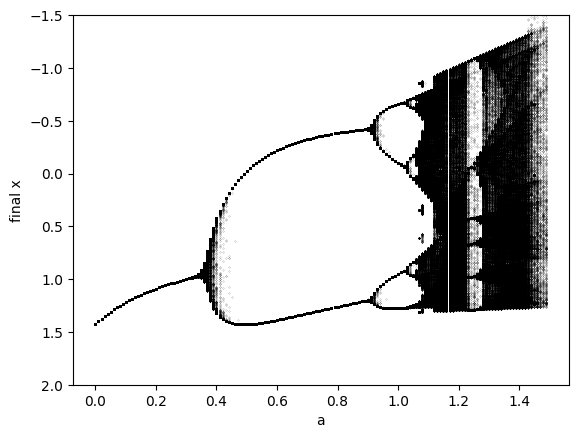

In [155]:
#final x함수 그리기
for a in np.arange(0,1.5,0.01):
  x_values, y_values, idx_values=henon_a(a)
  plt.scatter(idx_values, x_values,s=0.01, color='k')
plt.ylim([2,-1.5])
plt.xlabel('a')
plt.ylabel('final x')
plt.show()

<ipython-input-149-4543ad3b0013>:3: RuntimeWarning: overflow encountered in scalar power
  if yn+1-a*(xn**2)>100:
<ipython-input-149-4543ad3b0013>:6: RuntimeWarning: overflow encountered in scalar power
  return yn+1-a*(xn**2), b*xn
<ipython-input-149-4543ad3b0013>:3: RuntimeWarning: overflow encountered in scalar multiply
  if yn+1-a*(xn**2)>100:
<ipython-input-149-4543ad3b0013>:6: RuntimeWarning: overflow encountered in scalar multiply
  return yn+1-a*(xn**2), b*xn


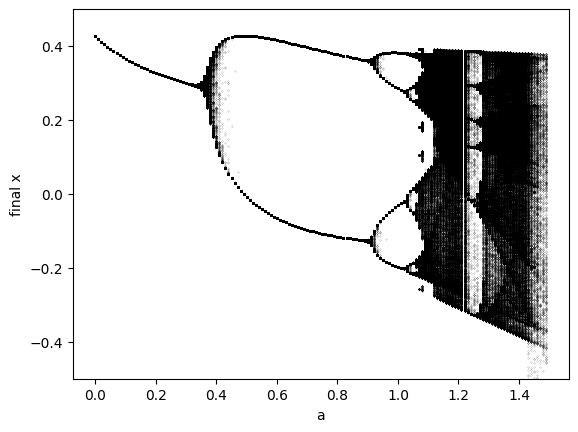

In [156]:
#final x함수 그리기
for a in np.arange(0,1.5,0.01):
  x_values, y_values, idx_values=henon_a(a)
  plt.scatter(idx_values, y_values,s=0.01, color='k')
plt.ylim([-0.5,0.5])
plt.xlabel('a')
plt.ylabel('final x')
plt.show()

앞선 Feigenbaum diagram의 경우와 마찬가지로 컴퓨터의 성능과 시간적 한계상 충분하지 못한 parameter값으로 henon's transformation에서 Feigenbaum diagram을 그리게 되어서, 그래프 상에서 해상도가 낮은 모습을 관찰할 수 있다. a에 따른 final x의 그래프와 final y의 그래프의 개형이 일치하는 모습으로부터 두 값이 비슷한 양상을 보인다는 것을 파악할 수 있다.